In [6]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load Data
data = pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\train.csv")
test=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\test.csv")
submission_data=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\sample_submission.csv")

# Data Preprocessing
## Initial Exploration

In [9]:
#sample of data
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
#Complete details about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
#To display the names of all columns in a dataset.
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
#To determine the number of rows and columns in the dataset.
data.shape

(54808, 14)

In [16]:
#To determine the data type of each column in a dataset.
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [18]:
# Identify duplicate entries in the dataset.
data.duplicated().sum()

0

In [20]:
#Identify find the null values columns.
data.isna().sum()

# The columns containing null values are: education and previous_year_rating.

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Exploratory Data Analysis.

In [23]:
#Checking if the data is balanced by examining the distribution of values in the 'is_promoted' column using value_counts().
data['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [13]:
data['is_promoted'].value_counts(normalize=True)*100

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

In [25]:
#To view the number of unique values and the corresponding values in each column.
print("No of unique value")
print("--------------")
for col in data.columns:
    print(col ,":" ,data[col].nunique())

print("==========================================================")

print("Unique values of the columns which is containing minimum distinct unique value")  
print("--------------")
for col in data.columns:
    if data[col].nunique()<10:
        print(col ,":" ,data[col].unique())

No of unique value
--------------
employee_id : 54808
department : 9
region : 34
education : 3
gender : 2
recruitment_channel : 3
no_of_trainings : 10
age : 41
previous_year_rating : 5
length_of_service : 35
KPIs_met >80% : 2
awards_won? : 2
avg_training_score : 61
is_promoted : 2
Unique values of the columns which is containing minimum distinct unique value
--------------
department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
education : ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender : ['f' 'm']
recruitment_channel : ['sourcing' 'other' 'referred']
previous_year_rating : [ 5.  3.  1.  4. nan  2.]
KPIs_met >80% : [1 0]
awards_won? : [0 1]
is_promoted : [0 1]


In [27]:
#seperate numeric columns and categorical columns and ignore and target columns

ignore_col=['employee_id']
target_col=['is_promoted']
num_col=[]
cat_col=[]
for col in data.columns:
    if col not in ignore_col + target_col:
        if data[col].dtypes == 'object':
            cat_col.append(col)
        else:
            num_col.append(col)

In [29]:
print(ignore_col)
print(target_col)
print(num_col)
print(cat_col)

['employee_id']
['is_promoted']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
['department', 'region', 'education', 'gender', 'recruitment_channel']


In [31]:
#Provides a transposed summary of statistical statistics for numerical columns.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [33]:
# to compute the correlation matrix for the numerical columns in the dataset.
data[num_col].corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122
KPIs_met >80%,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000


In [37]:
# to compute the correlation matrix for the numerical columns in the dataset and target column
data[num_col+target_col].corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


### Univariate Analysis:

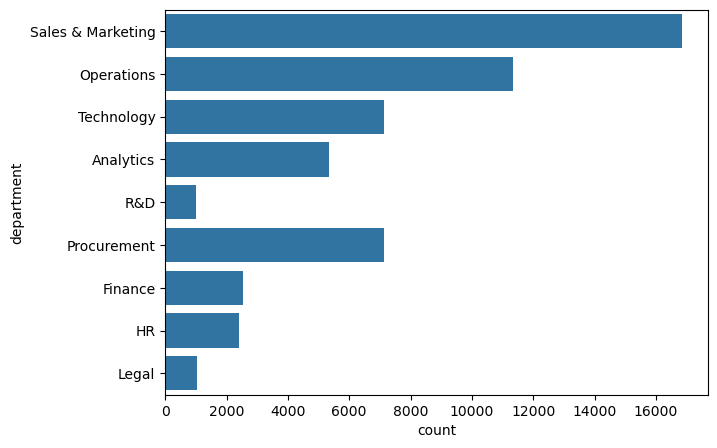

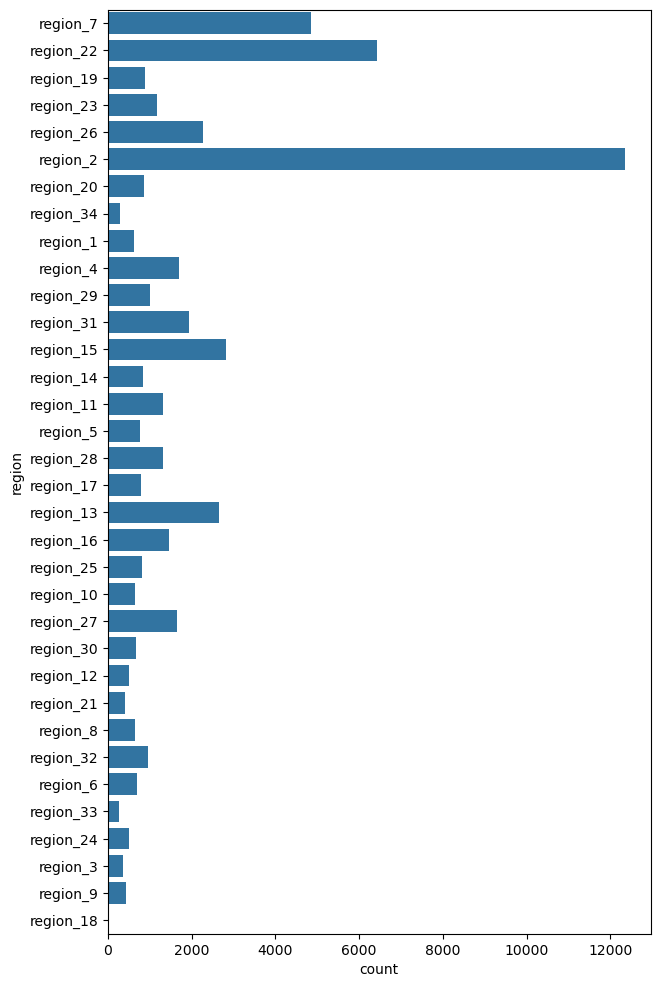

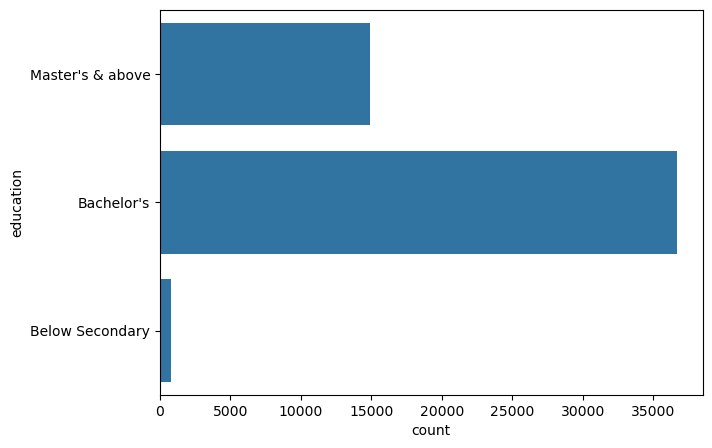

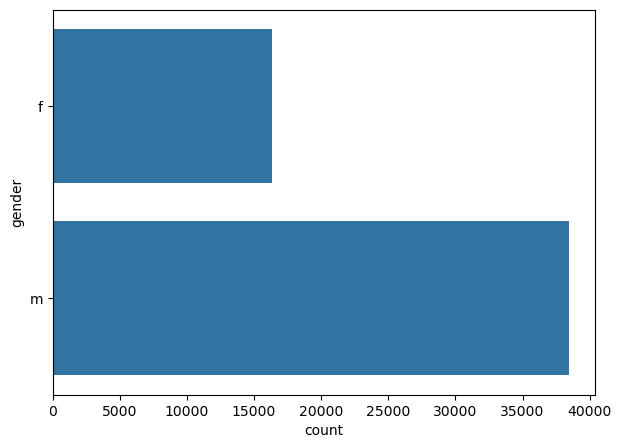

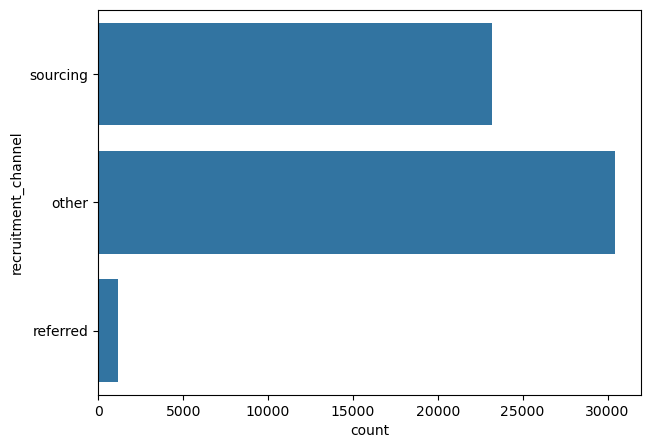

In [42]:
#iterates through all categorical columns in the dataset and creates a countplot for each categorical feature.
for col in data.select_dtypes(include='object').columns:
    if col == 'region':
        plt.figure(figsize=(7,12))
    else:
        plt.figure(figsize=(7,5))
    sns.countplot(y=data[col])
    plt.show()

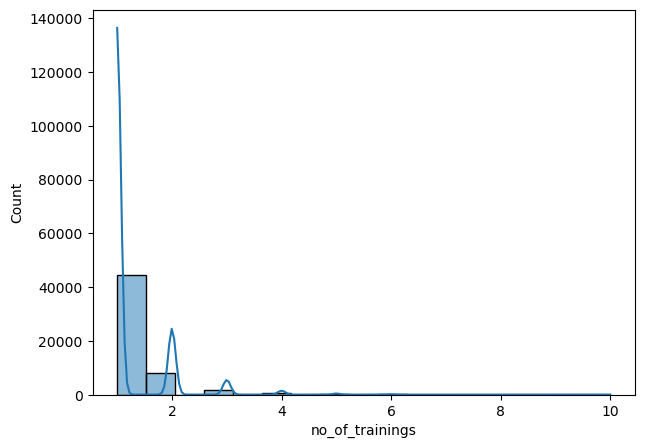

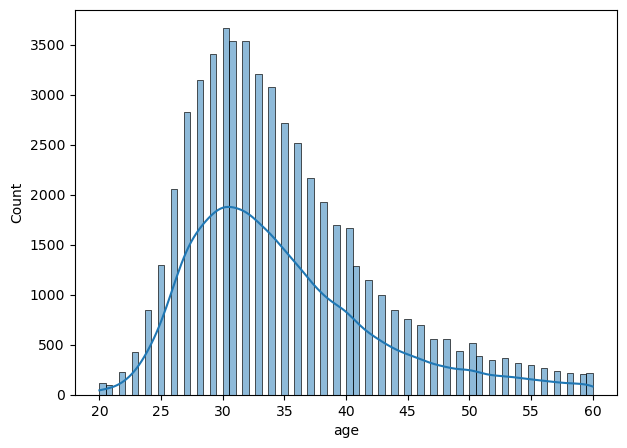

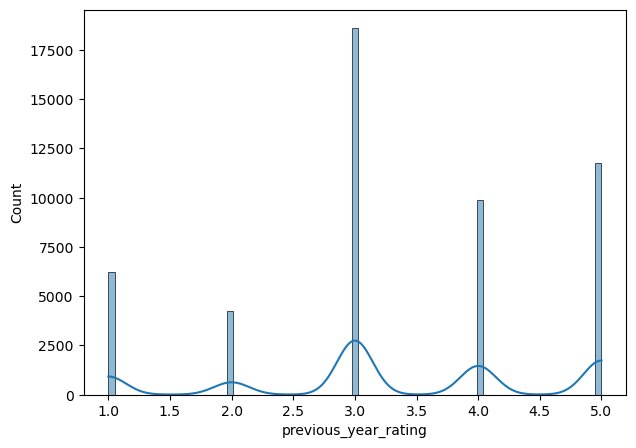

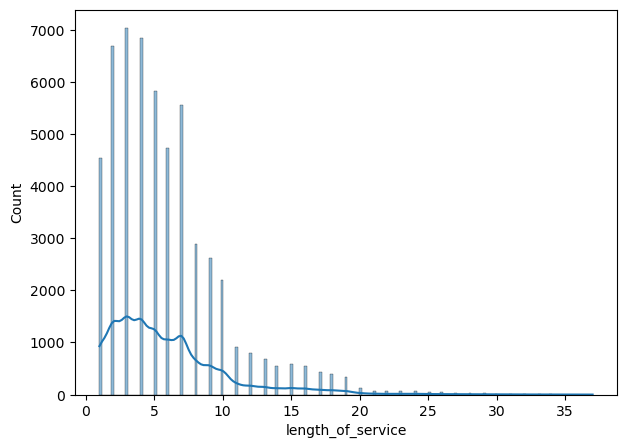

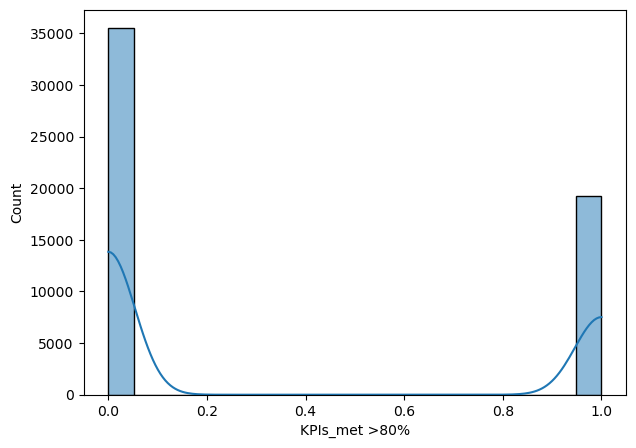

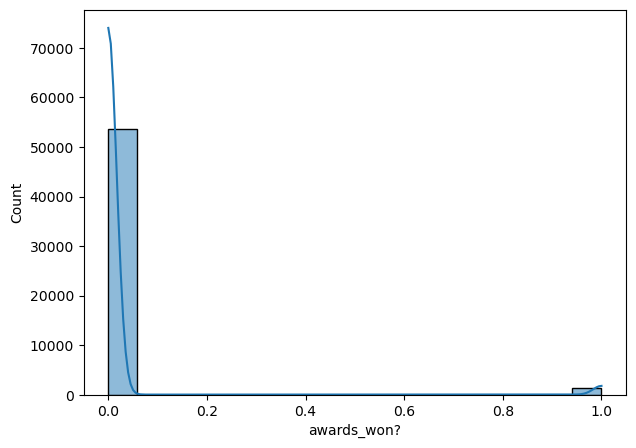

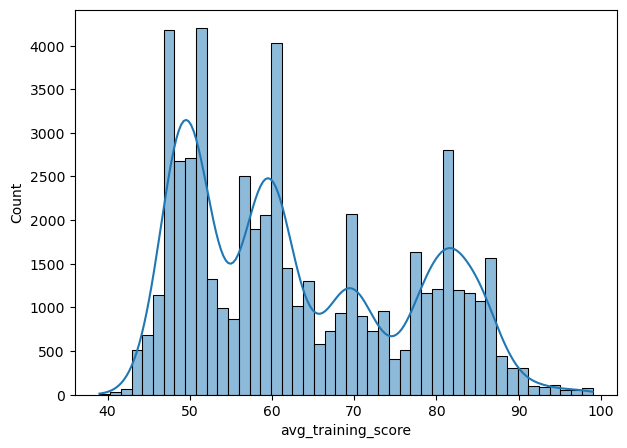

In [48]:
#iterates through all numerical columns in the dataset and creates a countplot for each numerical feature.
for col in num_col:
    plt.figure(figsize=(7,5))
    sns.histplot(data[col],kde=True)
    plt.show()


### Bivariate Analysis:

<Axes: >

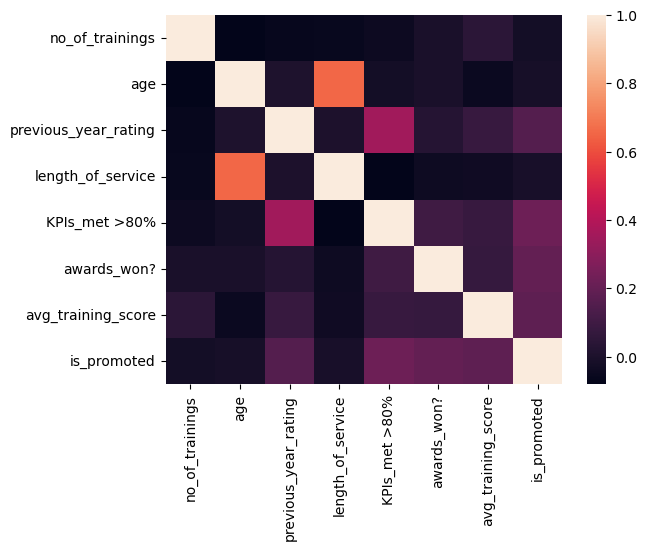

In [39]:
#heatmap to visualize the correlation matrix between numerical columns and the target column.
sns.heatmap(data[num_col+target_col].corr())

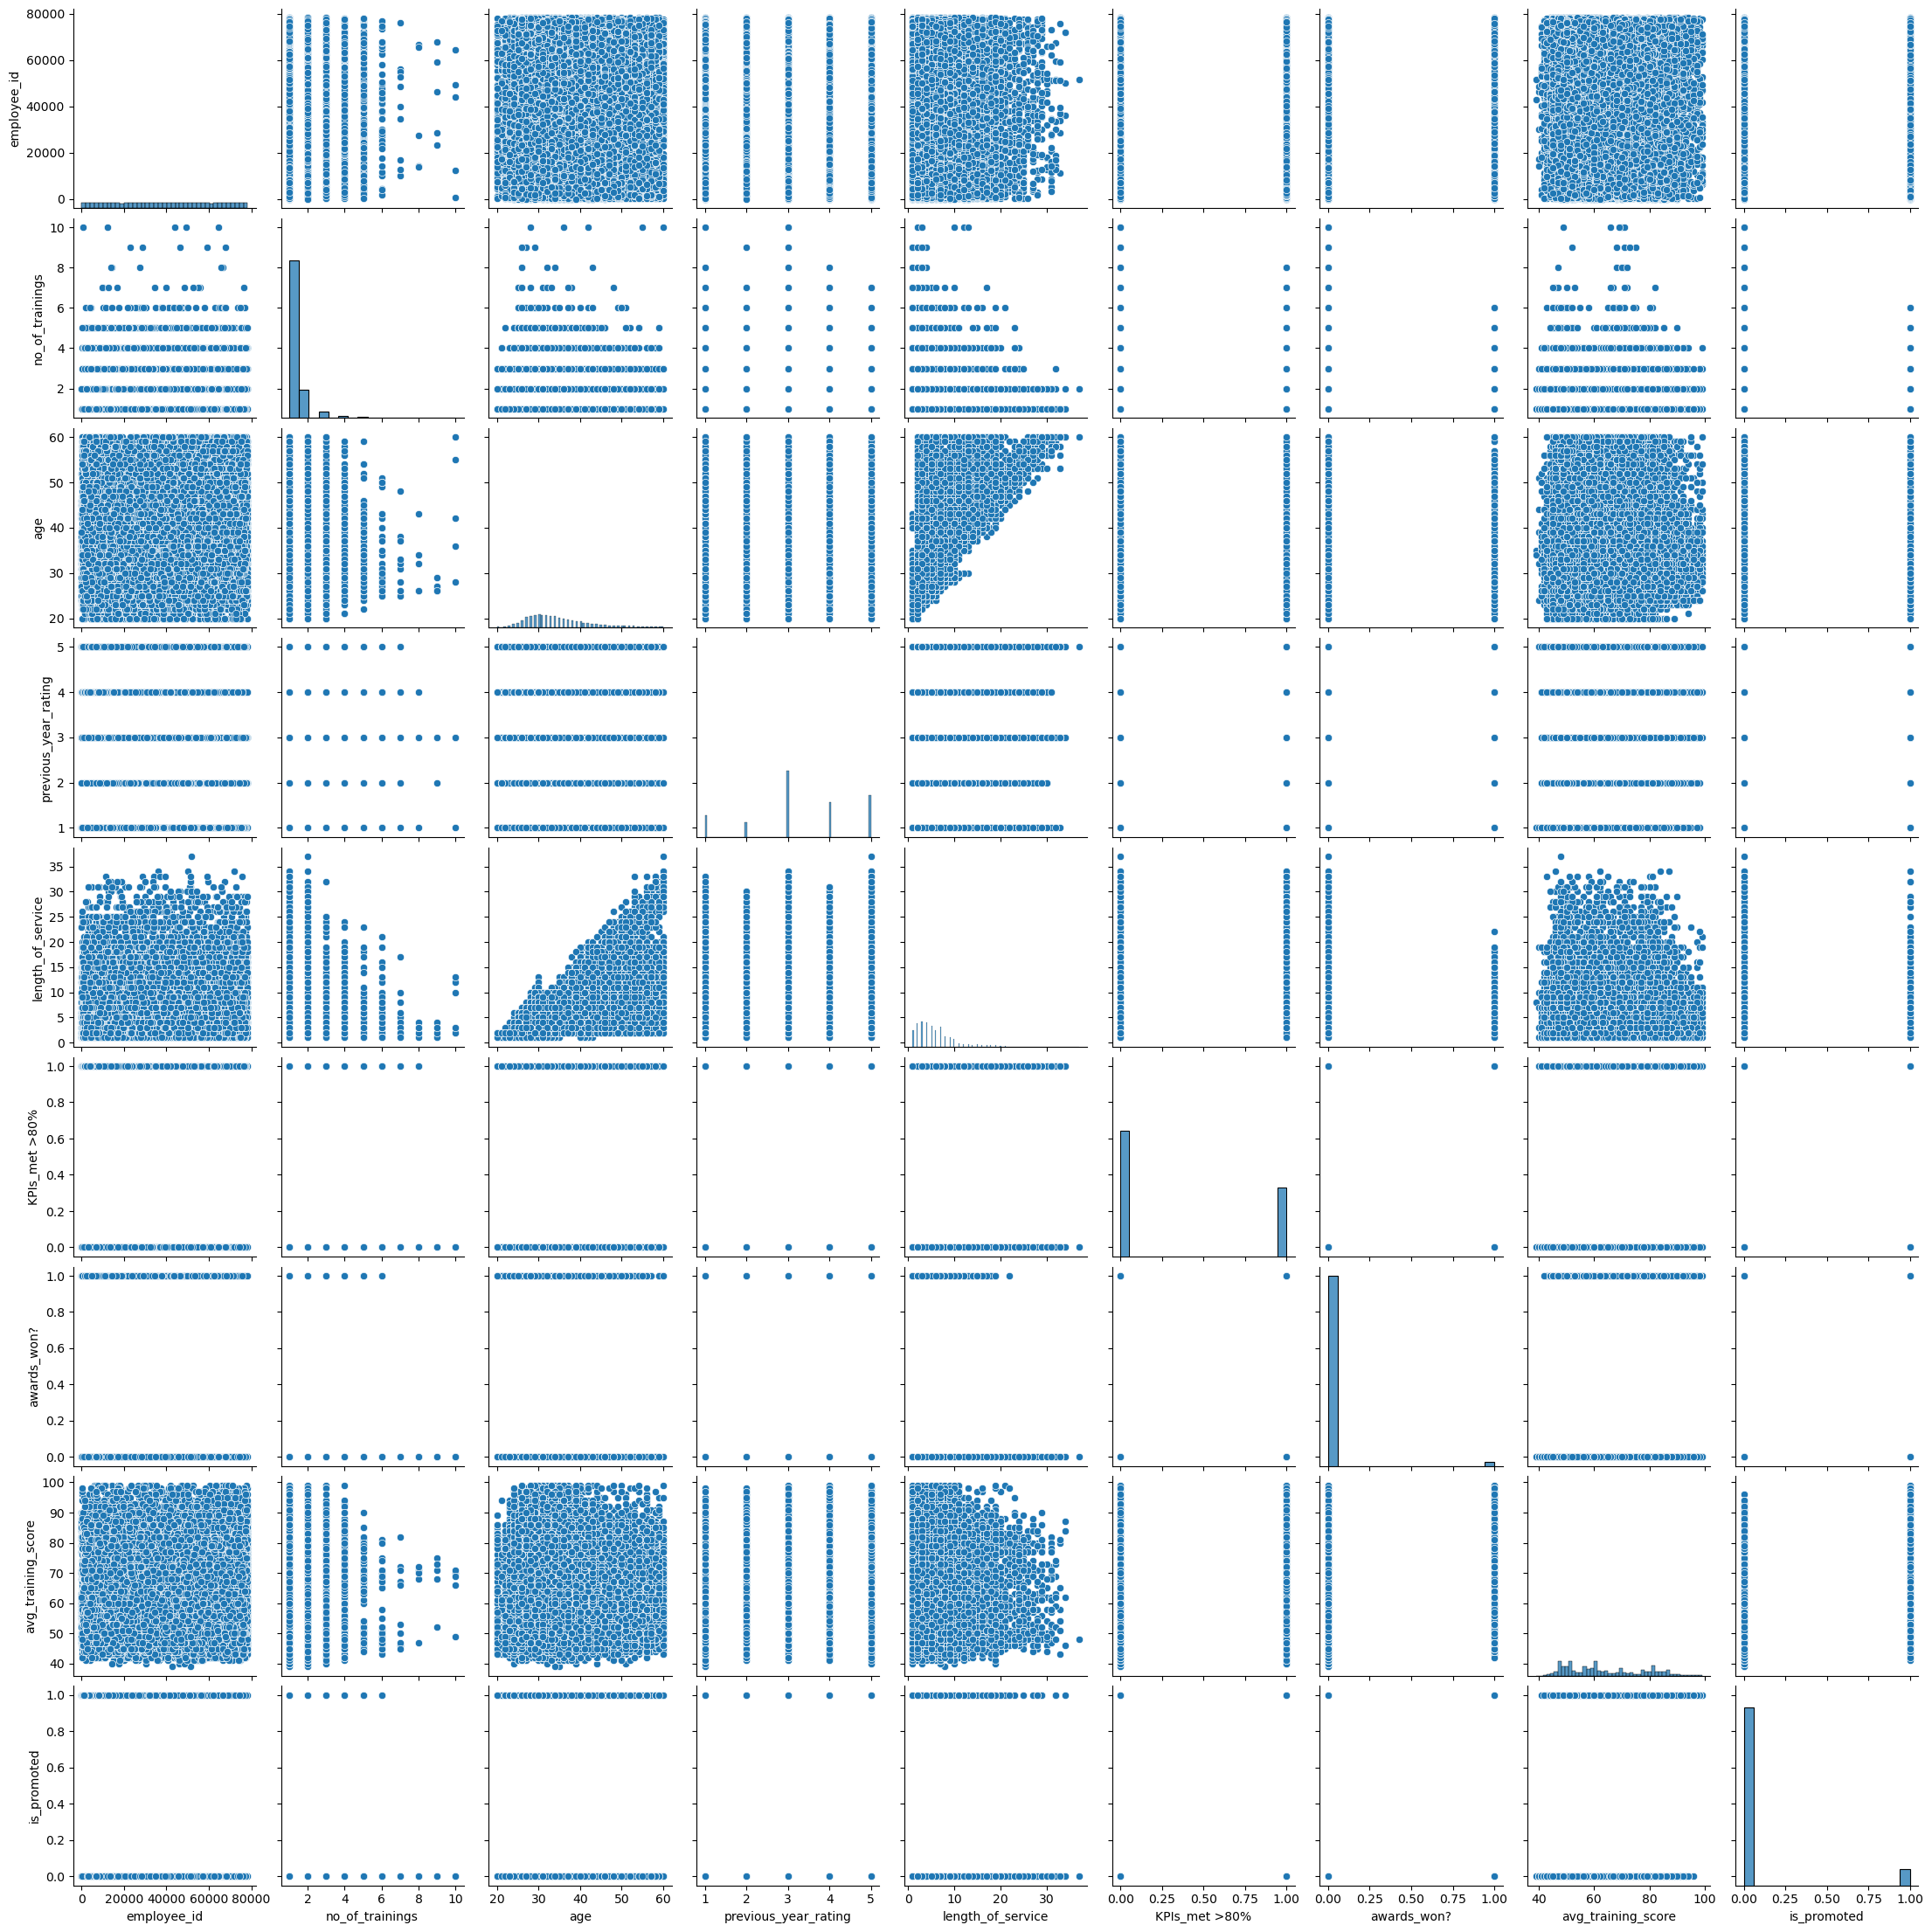

In [53]:
sns.pairplot(data)


### To analyze the distribution of categorical features against the target variable.

In [77]:
print(cat_col)
print(num_col)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


<Axes: xlabel='education', ylabel='count'>

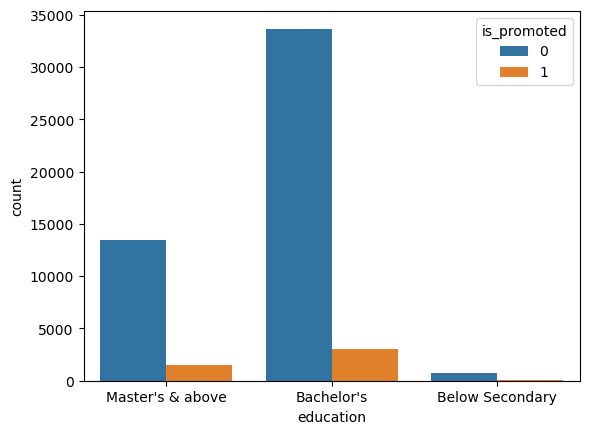

In [73]:
#Countplot of Categorical Feature vs Target
sns.countplot(x='education', hue='is_promoted', data=data)

<Axes: xlabel='education'>

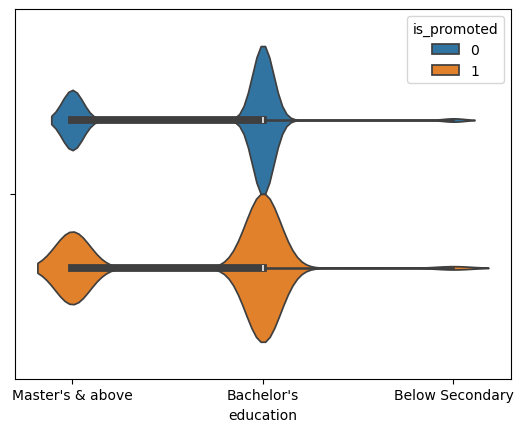

In [75]:
#violinplot of Categorical Feature vs Target
sns.violinplot(x='education', hue='is_promoted', data=data)

<Axes: xlabel='gender'>

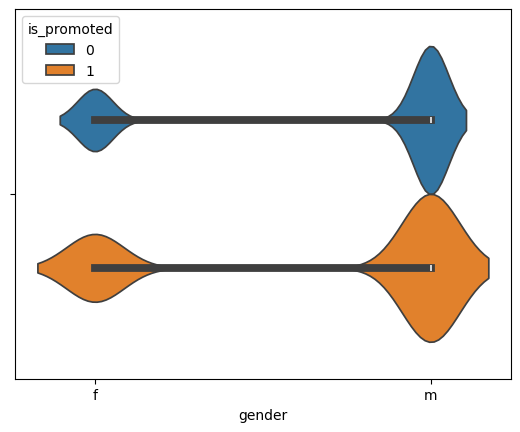

In [79]:
#violinplot of Categorical Feature vs Target
sns.violinplot(x='gender', hue='is_promoted', data=data)

<Axes: xlabel='recruitment_channel'>

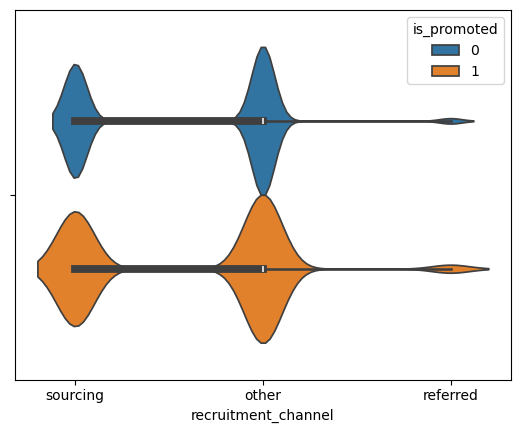

In [83]:
#violinplot of Categorical Feature vs Target
sns.violinplot(x='recruitment_channel', hue='is_promoted', data=data)

<Axes: xlabel='region'>

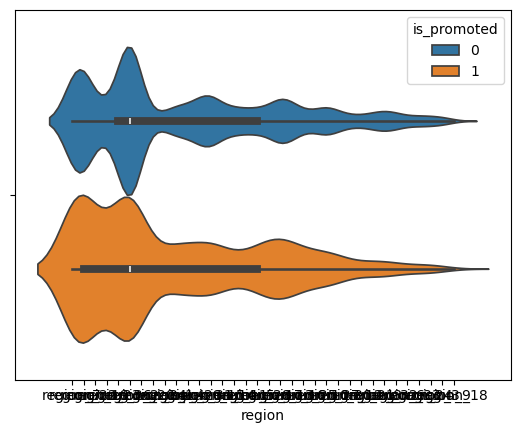

In [85]:
#violinplot of Categorical Feature vs Target
sns.violinplot(x='region', hue='is_promoted', data=data)

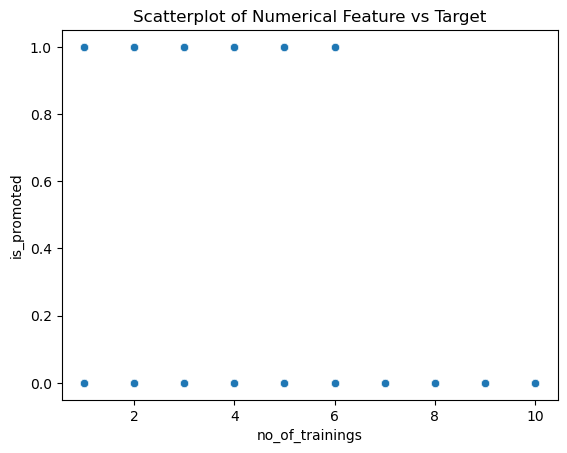

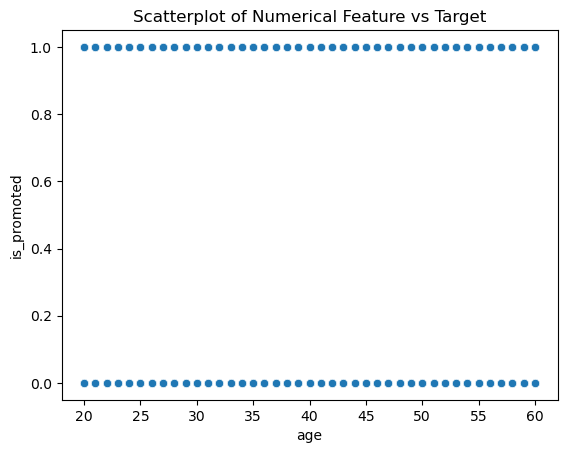

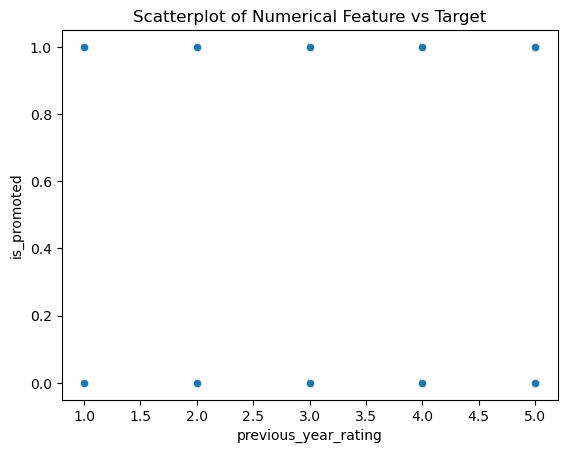

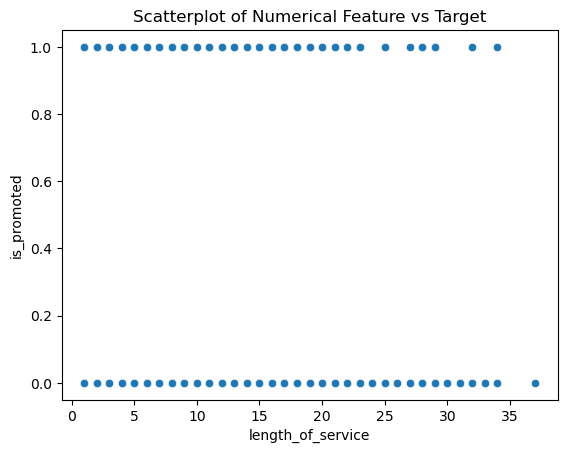

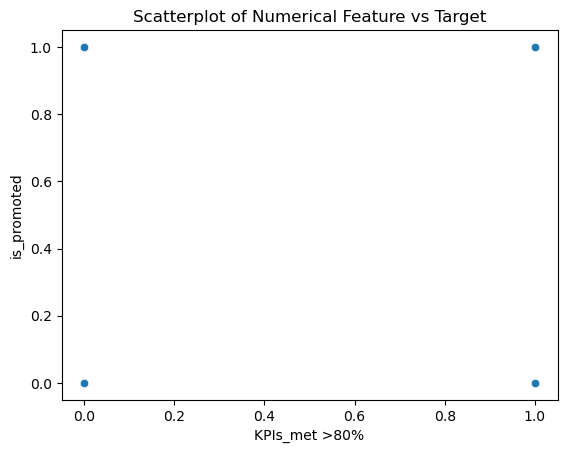

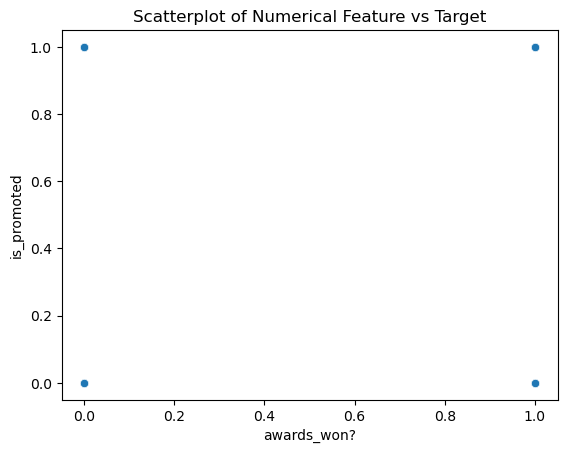

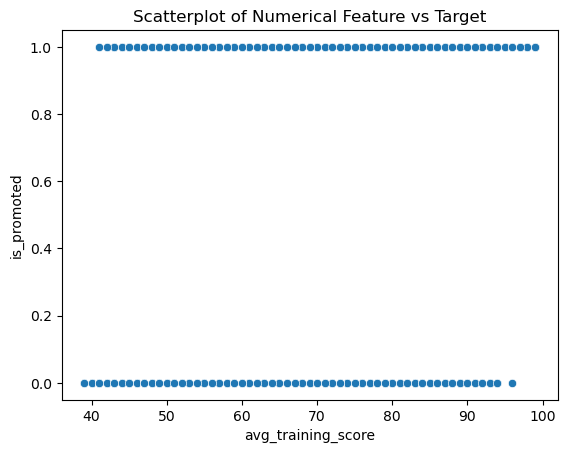

In [91]:
for col in num_col:
    sns.scatterplot(x=data[col], y='is_promoted', data=data)
    plt.title('Scatterplot of Numerical Feature vs Target')
    plt.show()

### Check for outliers using boxplots 

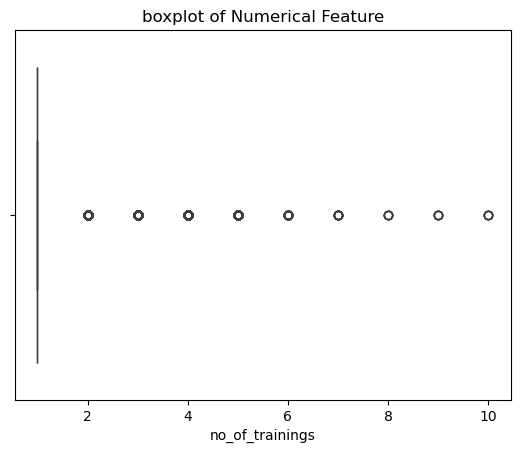

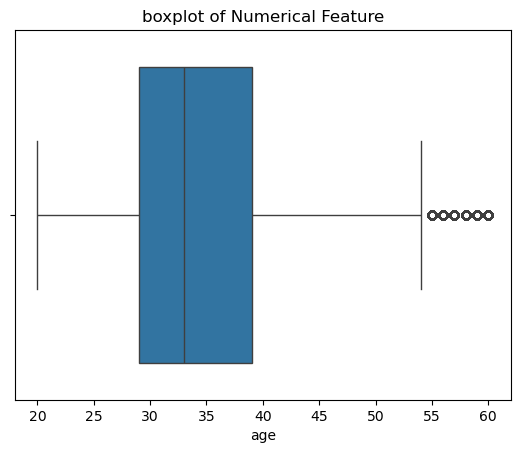

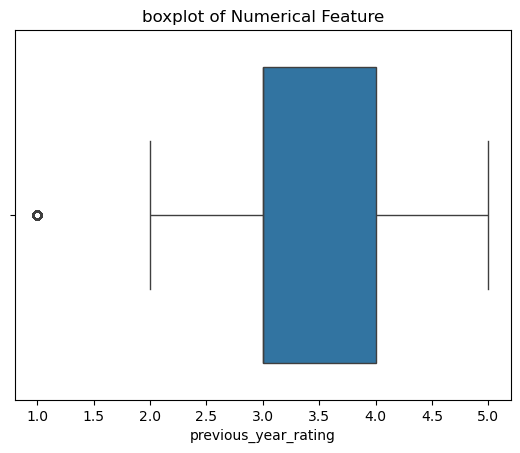

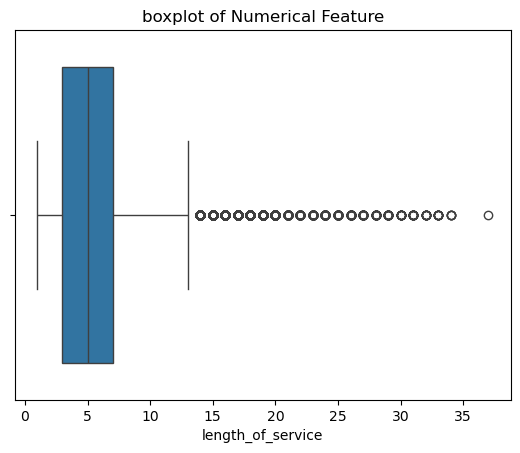

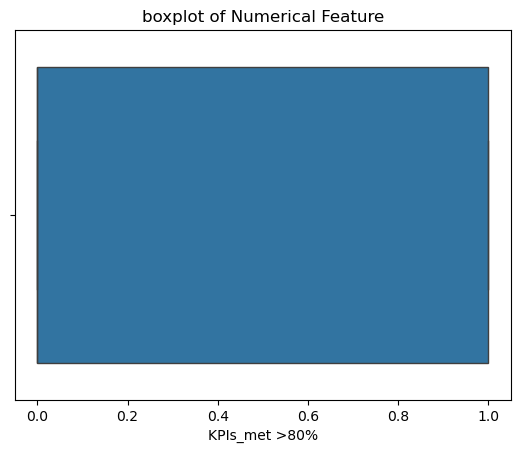

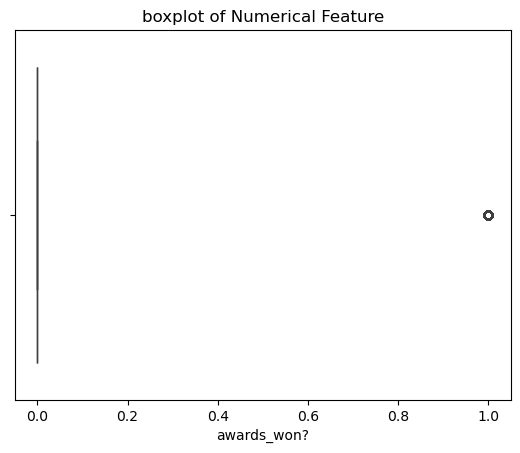

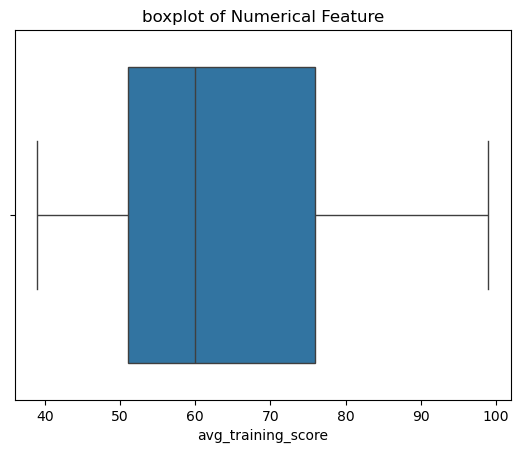

In [98]:
for col in num_col:
    sns.boxplot(x=data[col], data=data)
    plt.title('boxplot of Numerical Feature')
    plt.show()

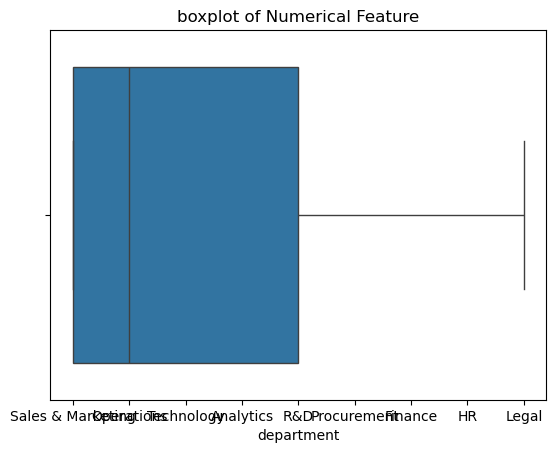

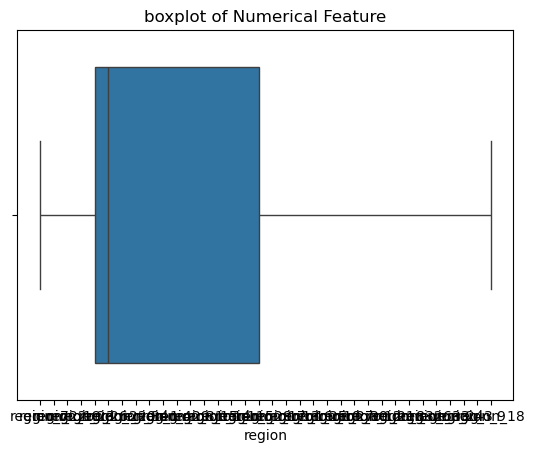

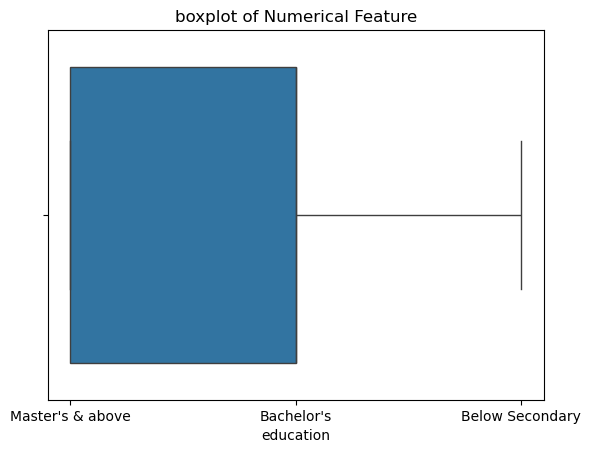

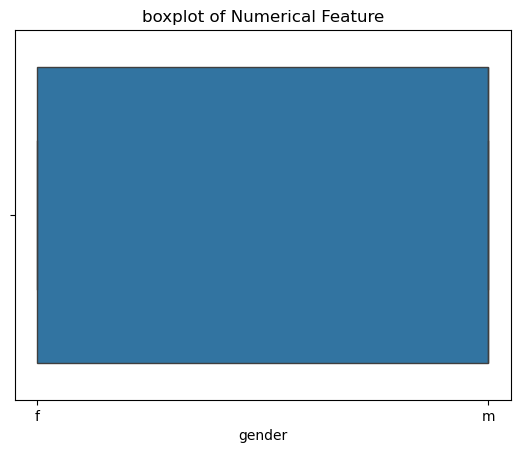

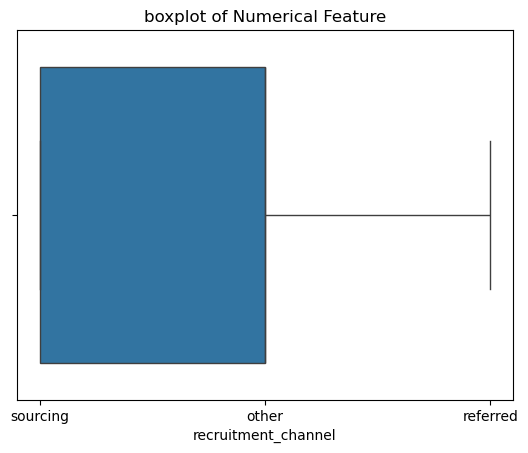

In [100]:
for col in cat_col:
    sns.boxplot(x=data[col], data=data)
    plt.title('boxplot of Numerical Feature')
    plt.show()

### Imputation

#### previous_year_rating - imputation using knn

In [105]:
data[(data['previous_year_rating'].isna()) & (data['length_of_service'] == 1) ]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [233]:
#KNN

In [17]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
ignore_col=['employee_id','education','is_promoted']
target_col=['previous_year_rating']
num_col=[]
cat_col=[]
for col in data.columns:
    if col not in ignore_col + target_col:
        if data[col].dtypes == 'object':
            cat_col.append(col)
        else:
            num_col.append(col)

In [21]:
#categorical and numerical columns imputed and encoded
#categorical columns imputed by mode and encoded by onehotencoder
#numerical columns imputed by median and encoded by standardscalar
cat_pipe_encode=Pipeline(
    steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
num_pip_encode=Pipeline(
    steps=[
    ('standardscalar',StandardScaler())
])
## map tranformation to features
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_col),
        ('num_encode',num_pip_encode,num_col)
    ]
)

In [23]:
data2= data.copy()
data_notnull=data2[data2['previous_year_rating'].notnull()]
data_null = data2[data2['previous_year_rating'].isna()]

X=data_notnull.drop(columns=['previous_year_rating','education','is_promoted'])
y=data_notnull['previous_year_rating']

model_pipeline = Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('model',KNeighborsClassifier(n_neighbors=5))
    ]
)
model_pipeline.fit(X,y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('standardscalar',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', KNeighborsClassifier())])

In [25]:
test=data_null.drop(columns=['previous_year_rating','education','is_promoted'])
pred = model_pipeline.predict(test)

In [26]:
data2.loc[data2['previous_year_rating'].isna(),'previous_year_rating'] = pred

<Axes: ylabel='Density'>

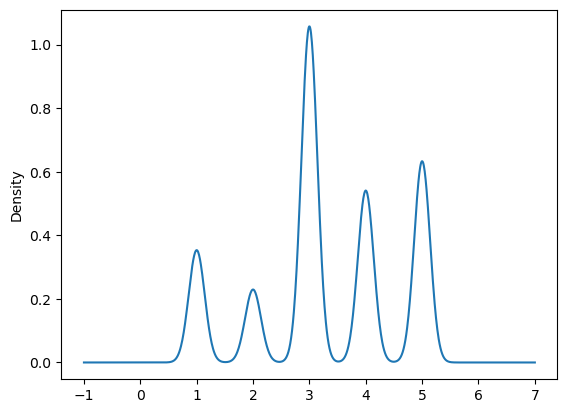

In [29]:
data2['previous_year_rating'].plot(kind='kde')

In [33]:
print(data['previous_year_rating'].value_counts())
print(data2['previous_year_rating'].value_counts())

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64
previous_year_rating
3.0    20593
5.0    12330
4.0    10534
1.0     6882
2.0     4469
Name: count, dtype: int64


In [123]:
data2.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [127]:
#### education - imputation using mode

In [147]:
data2['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

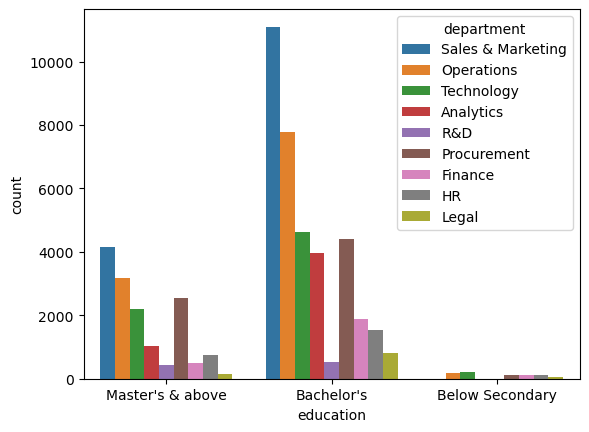

In [149]:
sns.countplot(x='education' , hue ='department' , data =data2)

In [150]:
data2.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [153]:
data2['education'].mode()

0    Bachelor's
Name: education, dtype: object

<Axes: xlabel='education', ylabel='department'>

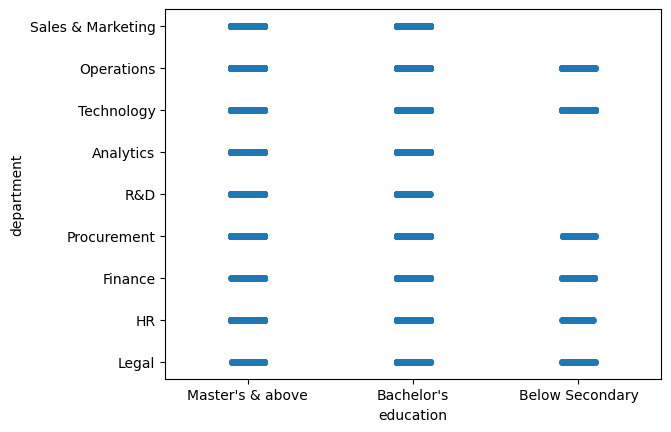

In [155]:
# checking relationship between education and department columns
sns.stripplot(x='education',y='department',data=data2)

In [156]:
x=data2[data2['education'].isna()]['department']
x

10              Technology
21              Operations
32       Sales & Marketing
43       Sales & Marketing
82       Sales & Marketing
               ...        
54692    Sales & Marketing
54717            Analytics
54729                   HR
54742    Sales & Marketing
54806    Sales & Marketing
Name: department, Length: 2409, dtype: object

In [159]:
data2['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [161]:
data2[data2['department']=='Sales & Marketing']['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [163]:
data2[data2['department']=='Operations']['education'].mode()

0    Bachelor's
Name: education, dtype: object

## Conclusion

1) Univariate Analysis:

- For categorical columns, I used count plots to explore their distribution.
- For numerical columns, I used histograms along with Kernel Density Estimation (KDE) plots.

2) Bivariate Analysis:

- I performed bivariate analysis using a heatmap to examine correlations between features.
- I also used a pair plot to visualize relationships between numerical variables.

3) Relationship Between Features and Target:

- To analyze the relationship between categorical features and the target, I used a violin plot.
- For numerical features and the target, I used a scatter plot.
- However, I did not find any clear linear correlation between the features and the target. For instance, I observed that individuals with 1 year of service received varying ratings in the previous_year_rating, making it difficult to draw any definitive conclusions.

4) Handling Missing Data:

- In my analysis, I discovered that all the missing values in the previous_year_rating column occurred for individuals with a length_of_service of 1 year.
  
 --  Imputation Strategy:
 
- As a result, I decided to use K-Nearest Neighbors (KNN) to predict the missing values in the previous_year_rating column.
- For the education column, I will use the mode to fill missing values.
- For understanding, I created a copy of the dataset, named data2, and implemented the imputation there.
- The actual imputation will be done in the model pipeline during the machine learning model-building process.
